## Airbnb Dataset: 
https://www.kaggle.com/airbnb/seattle/data
### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Beijing, China.

### Content
The following Airbnb activity is included in this Beijing dataset:

Listings, including full descriptions and average review score
Reviews, including unique id for each reviewer and detailed comments
Calendar, including listing id and the price and availability for that day

### Inspiration
Can you describe the vibe of each Seattle neighborhood using listing descriptions?
What are the busiest times of the year to visit Seattle? By how much do prices spike?
Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?
For more ideas, visualizations of all Seattle datasets can be found here.

### Acknowledgement
This dataset is part of Airbnb Inside, and the original source can be found here.
(http://insideairbnb.com/get-the-data.html)


## Analysis Procedures (CRISP-DM)


### 1. Business understanding

    - What are the busiest times of the year to visit Seattle? 
    - How the price changes over one year? 
    - Can you build a price suggestor for listings? which features impact the price most?
    - Can you predict the review score? What features makes the customers feel more satisfied?

    
### 2. Data understanding
    - Data exploration
    
### 3. Data preparation
    - Handling missing values, categorical values, and feature engineering.

### 4. Modelling
    - Use clustering algorithms for grouping/recommendation purpose.
    - Use regression to suggest owner the reseaonable price range.

### 5. Results
    - Answer questions in step 1 'Business understanding' with data visualization.

## 2. Data understanding

In this part, the three datasets in csv format is imported into dataframes using `pandas`, and explored using available pandas functions in below cells. The information obtained about the datasets is summarized as below in this cell.

**Calender dataset** contains the price information for each listing in a calender year. There are 3818 unique `listing_id` in the dataset, and for each `listing_id` there are 365 rows of price corresponding one day between _2016-01-04 and 2017-01-02_ .<br>
The `available` column has two unique values _'t' or 'f'_ meaning _True or False_. When a listing is not available for the day, the columns `price` is _nan_.

**Listing dataset** contains the full description for each listing scraped on _2016-01-04_ , with 3818 rows describing 3818 unique listings. <br>
There are 92 columns/features in this dataset, thus a lot of information that need to be selectively used in later session. <br>
Telling from the column names, the features can be roughly divided into below categories: listing info, host info, location, room/house info, price and booking, reviews, and policies.

**Reviews dataset** contains all the review entries for above mention 3818 listings by _2016-01-03_ since 2009. Each row records the review's info and the detailed text comments for a listing in a certain day, without a numerical score feature. <br>
The positivity of each comments could be predicted through a NLP modelling, but it's not in the objectives of this analysis and the _listing_ dataset already have features of reviews in numerical scores. Thus, the _reviews_ dataset will not be used for furthur analysis.

In [85]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

calender_path = '/Users/clairegong/Desktop/UdacityDataScienceNanoDegree/seattle airbnb dataset/calendar.csv'
listing_path = '/Users/clairegong/Desktop/UdacityDataScienceNanoDegree/seattle airbnb dataset/listings.csv'
reviews_path = '/Users/clairegong/Desktop/UdacityDataScienceNanoDegree/seattle airbnb dataset/reviews.csv'

calender=pd.read_csv(calender_path)
listing=pd.read_csv(listing_path)
reviews=pd.read_csv(reviews_path)


In [86]:
calender.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [87]:
calender.listing_id.nunique()

3818

In [88]:
calender.listing_id.value_counts().head()

6752031     365
7404370     365
1259305     365
4672934     365
10310373    365
Name: listing_id, dtype: int64

In [89]:
print('Date range of calender data is between {} and {}.'.format(calender.date.min(),calender.date.max()))

Date range of calender data is between 2016-01-04 and 2017-01-02.


In [90]:
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [91]:
# listing.describe()

In [92]:
# listing.info() #3818 entries,92 columns

In [93]:
listing.shape

(3818, 92)

In [94]:
# listing.columns # 92 columns

In [95]:
listing.sample()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3006,30712,https://www.airbnb.com/rooms/30712,20160104002432,2016-01-04,Cozy Ballard Apartment,NaN,We are offering the upstairs of our cozy home....,We are offering the upstairs of our cozy home....,none,NaN,...,8.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.95


In [96]:
# listing.iloc[:,:10].sample()

In [97]:
reviews.sample(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
76655,6228474,51925080,2015-10-25,5017954,Erick,I was pleasantly surprised to find that the ph...
22869,282934,26362714,2015-02-10,8491457,Julie,My husband and I have stayed in Andra's wonder...
23618,1820794,38476800,2015-07-16,26791144,Pauline,Great experience here! Pam was very welcoming...
60460,47196,438976,2011-08-12,655936,Laura,"Shalini is an awesome host, and I would highly..."
57907,1599856,21285041,2014-10-14,5121143,Kelly,First time airbnb user and our stay was fantas...


In [98]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [99]:
print('Date range of review data is between {} and {}.'.format(reviews.date.min(),reviews.date.max()))

Date range of review data is between 2009-06-07 and 2016-01-03.


## 3. Data preparation

The _listing_ and _calender_ datasets will be processed in this section to be ready for comsumption for prediction models. From the information gathered in last part, below processing is in order: data cleaning, feature engineering, missing values imputing, categorical values imputing etc.



**Calender dataset**

In [100]:
#Data cleaning
# remove dollar signs $ and , in the price feature
calender.price = calender.price.replace('[\$,\,]','', regex=True)
calender.price = pd.to_numeric(calender.price)

# modify available feature to boolean values to be meaningful, and convenient for furthur calculation.
calender.available.replace({'t':True, 'f': False}, inplace=True)
calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null bool
price         934542 non-null float64
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 33.2+ MB


In [101]:
#Feature engineering
# One of our purposes is to see the price trends, considering neighborhoods, so I need to extract the useful 
# neighbourhood features from the listing dataset. After some checking, neighbourhood_group_cleansed feature 
# is the best one, merge this feature to the calender dataset.
neighourhood_group=listing[['id','neighbourhood_group_cleansed']].\
    rename(columns={'id':'listing_id','neighbourhood_group_cleansed':'neighbourhood'})
calender = calender.merge(neighourhood_group, how='left')

calender.sample(5)

,listing_id,date,available,price,neighbourhood
1330244,8051134,2016-07-06,True,65.0,Other neighborhoods
286986,9014572,2016-04-09,True,69.0,University District
651585,5324459,2016-03-04,False,NaN,West Seattle
466336,4243163,2016-08-22,True,595.0,Downtown
932201,9110560,2016-12-25,False,NaN,Other neighborhoods


In [102]:
# caculate the yearly occupancy_rate and mean_price for each listing using calender dataset
occupancy_rate=calender.groupby('listing_id').available.mean().reset_index(name='occupancy_rate')
mean_price=calender.groupby('listing_id').price.mean().reset_index(name='mean_price')

### Listing dataset

This dataset has too many(i.e. 92) features, it is known that models trained with too many features are prone to overfit and predict badly on unseen data, thus I need to select those possibly useful in answering our business questions, i.e. predicting prices and scores. Features with descriptive text values is not useful in this context
so I will exclude them all, with the exception for a few with categorical values. Also features that are likely to impact on price and review score but not much, are also discarded.

To select features, the data scientist/analyst need to examine EVERY feature, but a more efficient way I usually do is to examine features by BATCH of 10, or a number of your choice. 

**Examing** includes but is not limited to: checking <br>
- the unique values of categorical values by `nunique` `value_counts`
- the number of missing values by `isnull`
- data distribution of numerical values by `describe`
- comparing features with similar names by `filter`
- and so on


**Below are some features that I discarded as they will provide little information on predicting prices and review scores. Accompanying the feature names are some thoughts written for readers' reference.** <br>
- _experiences_offered_ : 3055/3055 is 'none'
- _host_acceptance_rate_ : 3044/3045 is 100%
- _host_total_listings_count_ : has same info as host_listings_count
- _host_verifications_ : could be useful, by splitting list into elements then into categorical values such as 'has_email', but is not worth the effort in this case.
- _host_has_profile_pic_ : 3809/3817 True
- _square_feet_ : is 97.4% missing using #listing.square_feet.isnull().mean()
- _weekly_price_ : is 47.3% missing, it could be organized to a no_weekly_price feature, but will be discarded in this context.
- _monthly_price_ : is 60.3% missing, reason to discard is as above.
- _calendar_updated_ : values could be unified into number of days ago, but it will be discarded in this context.
- _has_availability_ : 100% True
- _availability_30_ : and it stands for how many days the room is available in the next 30 days. availability_num features follows the same logic. Listing dataset will be used to predict price and score, so these features I think are less significant. To calculate occupancy rate, calender dataset can be used instead.
- _review_scores_xx_ : features I only keep one feature: review_scores_rating as it is representive of overall experience.
- _requires_license_ : 100% False
- _require_guest_profile_picture_ : 3497/3828 False, this could be useful but considered not significant, thus is discarded.
- _require_guest_phone_verification_ : reason to discard is similar to above.
- _host_since_ feature can be used to tell the experience of the host, discarded here as I am not familiar with datetime parsing.

**Codes below are the typical ones I used to examine the feature.**<br>
**Tips added after working a while and coming back: this process is time consume, should use `df.cor` on numerical features for faster elimination.**

In [103]:
listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [104]:
# Explore "score" features
scores=listing.filter(like='score')
# I tried to sum the scores in scale of 10, but seems not equals to the 100-scale review_scores_rating.
scores['scores_sum']=listing.filter(like='score').iloc[:,1:].sum(axis=1)
scores[['review_scores_rating','scores_sum']].head(5)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,review_scores_rating,scores_sum
0,95.0,59.0
1,96.0,60.0
2,97.0,60.0
3,NaN,0.0
4,92.0,56.0


In [105]:
listing.reviews_per_month.describe()

count    3191.000000
mean        2.078919
std         1.822348
min         0.020000
25%         0.695000
50%         1.540000
75%         3.000000
max        12.150000
Name: reviews_per_month, dtype: float64

In [106]:
listing.require_guest_profile_picture.value_counts()#.sort_index()

f    3497
t     321
Name: require_guest_profile_picture, dtype: int64

In [107]:
# Codes for examining features by batch of 10 
listing.iloc[:,0:10].sample()
listing.iloc[:,10:20].sample()
listing.iloc[:,20:30].sample()
listing.iloc[:,30:40].sample()
listing.iloc[:,40:50].sample()
listing.iloc[:,50:60].sample()
listing.iloc[:,60:70].sample()
listing.iloc[:,70:80].sample()
listing.iloc[:,80:90].sample()
listing.iloc[:,90:100].sample()

,calculated_host_listings_count,reviews_per_month
36,1,0.97


### Finally! I have the features I need

In [108]:

features = ['id','host_response_time','host_response_rate','host_is_superhost','host_listings_count',\
            'host_identity_verified','neighbourhood_group_cleansed','is_location_exact','property_type','room_type',\
           'accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit',\
            'cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','number_of_reviews',\
           'review_scores_rating','instant_bookable','cancellation_policy','reviews_per_month']

listing_cleansed=listing[features]
listing_cleansed.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,...,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,241032,within a few hours,96%,f,3.0,t,Queen Anne,t,Apartment,Entire home/apt,...,NaN,2,$5.00,1,365,207,95.0,f,moderate,4.07
1,953595,within an hour,98%,t,6.0,t,Queen Anne,t,Apartment,Entire home/apt,...,$40.00,1,$0.00,2,90,43,96.0,f,strict,1.48
2,3308979,within a few hours,67%,f,2.0,t,Queen Anne,t,House,Entire home/apt,...,$300.00,10,$25.00,4,30,20,97.0,f,strict,1.15
3,7421966,NaN,NaN,f,1.0,t,Queen Anne,t,Apartment,Entire home/apt,...,NaN,1,$0.00,1,1125,0,NaN,f,flexible,NaN
4,278830,within an hour,100%,f,2.0,t,Queen Anne,t,House,Entire home/apt,...,$125.00,6,$15.00,1,1125,38,92.0,f,strict,0.89


### but ... there is much more to be done: manufacture some potentially useful features from available data

In [109]:
# Count of amenties provided is made to a new feature for ease of anaylis.
amenities=listing.amenities.str.split(',')
listing_cleansed['amenities']=amenities.apply(lambda row: len(list(row)))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [110]:
# Add the yearly occupancy_rate and mean_price caculated earlier to the listing dataset
listing_cleansed=listing_cleansed.merge(occupancy_rate,left_on='id', right_on='listing_id').merge(mean_price)
listing_cleansed.drop(['listing_id','id'],axis=1,inplace=True)

In [111]:
listing_cleansed.head()

,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,...,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,occupancy_rate,mean_price
0,within a few hours,96%,f,3.0,t,Queen Anne,t,Apartment,Entire home/apt,4,...,$5.00,1,365,207,95.0,f,moderate,4.07,0.947945,85.000000
1,within an hour,98%,t,6.0,t,Queen Anne,t,Apartment,Entire home/apt,4,...,$0.00,2,90,43,96.0,f,strict,1.48,0.797260,170.931271
2,within a few hours,67%,f,2.0,t,Queen Anne,t,House,Entire home/apt,11,...,$25.00,4,30,20,97.0,f,strict,1.15,0.602740,1301.818182
3,NaN,NaN,f,1.0,t,Queen Anne,t,Apartment,Entire home/apt,3,...,$0.00,1,1125,0,NaN,f,flexible,NaN,0.391781,100.000000
4,within an hour,100%,f,2.0,t,Queen Anne,t,House,Entire home/apt,6,...,$15.00,1,1125,38,92.0,f,strict,0.89,1.000000,462.739726


In [112]:
listing_cleansed.shape

(3818, 29)

### Fomating the feature values
includes ...
- Remove the %, $ unit symbols from value features, convert format to numerical types.
- Convert f/t binary features values to binary features using 0/1
- Fill missing values
- Drop duplicates
- Get dummies of categorical values

In [113]:
for feature_with_symbol in ['cleaning_fee','extra_people','host_response_rate','price','security_deposit']:
    no_symbol = listing_cleansed[feature_with_symbol].replace('[\$,\%]','', regex=True)
    listing_cleansed[feature_with_symbol] = pd.to_numeric(no_symbol)

In [114]:
# For features having two categories only, knowing one indicates the other, thus replace them with '1'&'0', 
#no need one-hot encoding.
binary_features=['host_is_superhost','host_identity_verified', 'is_location_exact', 'instant_bookable']
listing_cleansed[binary_features]=listing_cleansed[binary_features].replace({'t':1, 'f':0})

### TRY drop features with many missing values

In [116]:
listing_cleansed.isnull().sum()
# features_drop=['host_response_time','host_response_rate','review_scores_rating','review_scores_rating',]
listing_dropna=listing_cleansed.dropna(subset=['host_response_time','host_response_rate',\
                                               'review_scores_rating','reviews_per_month','mean_price'],axis=0)

listing_dropna[['security_deposit','cleaning_fee']]=\
    listing_dropna[['security_deposit','cleaning_fee']].fillna(0.0)

# fill in others columns with missing values by 'mode' for categorical values, and by 'mean' for numerical values
categorical_features=listing_dropna.select_dtypes(include=['object']).columns.tolist()
numerical_features=listing_dropna.select_dtypes(exclude=['object']).columns.tolist()

from sklearn.impute import SimpleImputer
imp_med=SimpleImputer(strategy='median')
imp_mode=SimpleImputer(strategy='most_frequent')

listing_dropna[categorical_features]=pd.DataFrame(imp_mode.fit_transform(listing_dropna[categorical_features]))
listing_dropna[numerical_features]=pd.DataFrame(imp_med.fit_transform(listing_dropna[numerical_features]))
listing_dropna.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2819 entries, 0 to 3814
Data columns (total 29 columns):
host_response_time              2117 non-null object
host_response_rate              2117 non-null float64
host_is_superhost               2117 non-null float64
host_listings_count             2117 non-null float64
host_identity_verified          2117 non-null float64
neighbourhood_group_cleansed    2117 non-null object
is_location_exact               2117 non-null float64
property_type                   2117 non-null object
room_type                       2117 non-null object
accommodates                    2117 non-null float64
bathrooms                       2117 non-null float64
bedrooms                        2117 non-null float64
beds                            2117 non-null float64
bed_type                        2117 non-null object
amenities                       2117 non-null float64
price                           2117 non-null float64
security_deposit                21

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [31]:
#handling missing values
# target features 'mean_price' no missing values, 'review_scores_rating' has 647 missing values, later need to drop 
# rows for review_scores_rating is missing
listing_cleansed.isnull().sum()

# check 0 dulicates
listing_cleansed.duplicated().sum()

# Note for fee-related column, Nan values is equivalent =0, should be handle seperately

listing_cleansed[['security_deposit','cleaning_fee']]=\
    listing_cleansed[['security_deposit','cleaning_fee']].fillna(0.0)

# fill in others columns with missing values by 'mode' for categorical values, and by 'mean' for numerical values
categorical_features=listing_cleansed.select_dtypes(include=['object']).columns.tolist()
numerical_features=listing_cleansed.select_dtypes(exclude=['object']).columns.tolist()

from sklearn.impute import SimpleImputer
imp_med=SimpleImputer(strategy='median')
imp_mode=SimpleImputer(strategy='most_frequent')

listing_cleansed[categorical_features]=pd.DataFrame(imp_mode.fit_transform(listing_cleansed[categorical_features]))
listing_cleansed[numerical_features]=pd.DataFrame(imp_med.fit_transform(listing_cleansed[numerical_features]))
listing_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3818 entries, 0 to 3817
Data columns (total 29 columns):
host_response_time              3818 non-null object
host_response_rate              3818 non-null float64
host_is_superhost               3818 non-null float64
host_listings_count             3818 non-null float64
host_identity_verified          3818 non-null float64
neighbourhood_group_cleansed    3818 non-null object
is_location_exact               3818 non-null float64
property_type                   3818 non-null object
room_type                       3818 non-null object
accommodates                    3818 non-null float64
bathrooms                       3818 non-null float64
bedrooms                        3818 non-null float64
beds                            3818 non-null float64
bed_type                        3818 non-null object
amenities                       3818 non-null float64
price                           3818 non-null float64
security_deposit                38

In [32]:
# now data is processed we can furthur eliminate more  features by checking (numerical) feature correlations 
#with target variables 'price' and 'review_scores_rating' using `corr()` function
price_corr=listing_cleansed.corr()[['mean_price']].apply(lambda x: abs(x)).sort_values(by=['mean_price'],ascending=False)
price_corr

,mean_price
mean_price,1.000000
price,0.913705
accommodates,0.678462
bedrooms,0.625089
cleaning_fee,0.623970
beds,0.614594
bathrooms,0.524613
guests_included,0.371169
security_deposit,0.322960
amenities,0.231298


In [33]:
review_corr=listing_cleansed.corr()[['review_scores_rating']].apply(lambda x: abs(x)).\
    sort_values(by=['review_scores_rating'],ascending=False)
review_corr

,review_scores_rating
review_scores_rating,1.000000
host_is_superhost,0.214282
host_response_rate,0.126267
amenities,0.126150
host_listings_count,0.087018
reviews_per_month,0.074206
mean_price,0.059804
host_identity_verified,0.055041
price,0.052891
bathrooms,0.042085


In [34]:
# check categorical features's impact on price

print('- '*5,'price vs features','- '*5)
for feature in categorical_features:
    print(listing_cleansed.groupby(feature).mean_price.mean().sort_values(ascending=False))
    print()
    
#Comments on output data
# 1. host_response_time no correlation, as most active response corresponds to lowest price.
# other features ALL show great seperation of price range


# update categorical_features for precie suggester
categorical_features_price= ['neighbourhood_group_cleansed', 'property_type',
       'room_type', 'bed_type', 'cancellation_policy']

- - - - -  price vs features - - - - - 
host_response_time
within a day          139.057569
within a few hours    138.124497
within an hour        132.746934
a few days or more    131.389111
Name: mean_price, dtype: float64

neighbourhood_group_cleansed
Magnolia               192.425434
Downtown               176.299550
Queen Anne             166.667102
Cascade                144.868570
West Seattle           144.682381
Capitol Hill           134.184380
Central Area           131.932261
Ballard                126.697522
Other neighborhoods    125.291529
Interbay               117.308887
Seward Park            107.857178
University District     98.645743
Beacon Hill             97.887280
Rainier Valley          95.697608
Lake City               95.398113
Northgate               94.084274
Delridge                88.587493
Name: mean_price, dtype: float64

property_type
Boat               282.624315
Condominium        159.232970
Loft               138.584636
House              137.030213


In [35]:
# check categorical features's impact on review scores

print('- '*5,'review vs features','- '*5)
for feature in categorical_features:
    print(listing_cleansed.groupby(feature).review_scores_rating.mean().sort_values(ascending=False))
    print()
    
#Comments on output data
# 1. host_response_time data indicates that inresponsive hosts has much lower reviews
# 2. neighbourhood has impact on user experience although the difference is not large, 
#    except for 'Univeristy district', the score is much lower than the rest. 
# 3. property_type affect people's experience also, with 'Yurt' having the perfect score of 100 
#    and 'Dorm' and 'Chalet' having lower scores.
# 4. 'shared' room_type has slightly lower scores.
# 5. 'couch' has higher scores than 'real bed'? hmm, it's not reasonable.
# 6. 'cancellation_policy' has somewhat correlation on scores

# Update categorical_features 
categorical_features_reviews=['host_response_time', 'neighbourhood_group_cleansed', 'property_type',
       'room_type', 'cancellation_policy']

- - - - -  review vs features - - - - - 
host_response_time
within an hour        95.212641
within a day          94.628141
within a few hours    94.108471
a few days or more    89.736842
Name: review_scores_rating, dtype: float64

neighbourhood_group_cleansed
Central Area           96.008130
West Seattle           95.891626
Delridge               95.886076
Ballard                95.608696
Queen Anne             95.535593
Seward Park            95.136364
Northgate              94.937500
Rainier Valley         94.930818
Other neighborhoods    94.812343
Lake City              94.641791
Capitol Hill           94.527337
Magnolia               94.295082
Beacon Hill            94.271186
Downtown               94.243396
Interbay               94.181818
Cascade                93.415730
University District    90.049180
Name: review_scores_rating, dtype: float64

property_type
Yurt               100.000000
Bungalow            97.153846
Townhouse           96.423729
Cabin               96.238095


In [36]:
# one hot encode categorical values
listing_encoded=pd.get_dummies(listing_cleansed)


Text(0.5, 1, 'Correlation of categorical features')

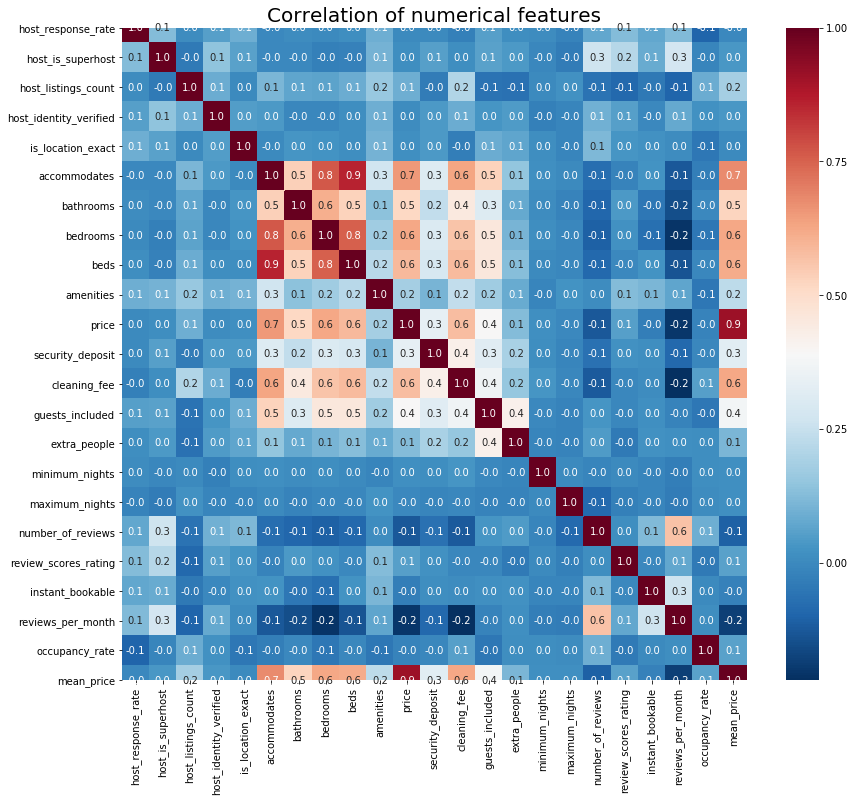

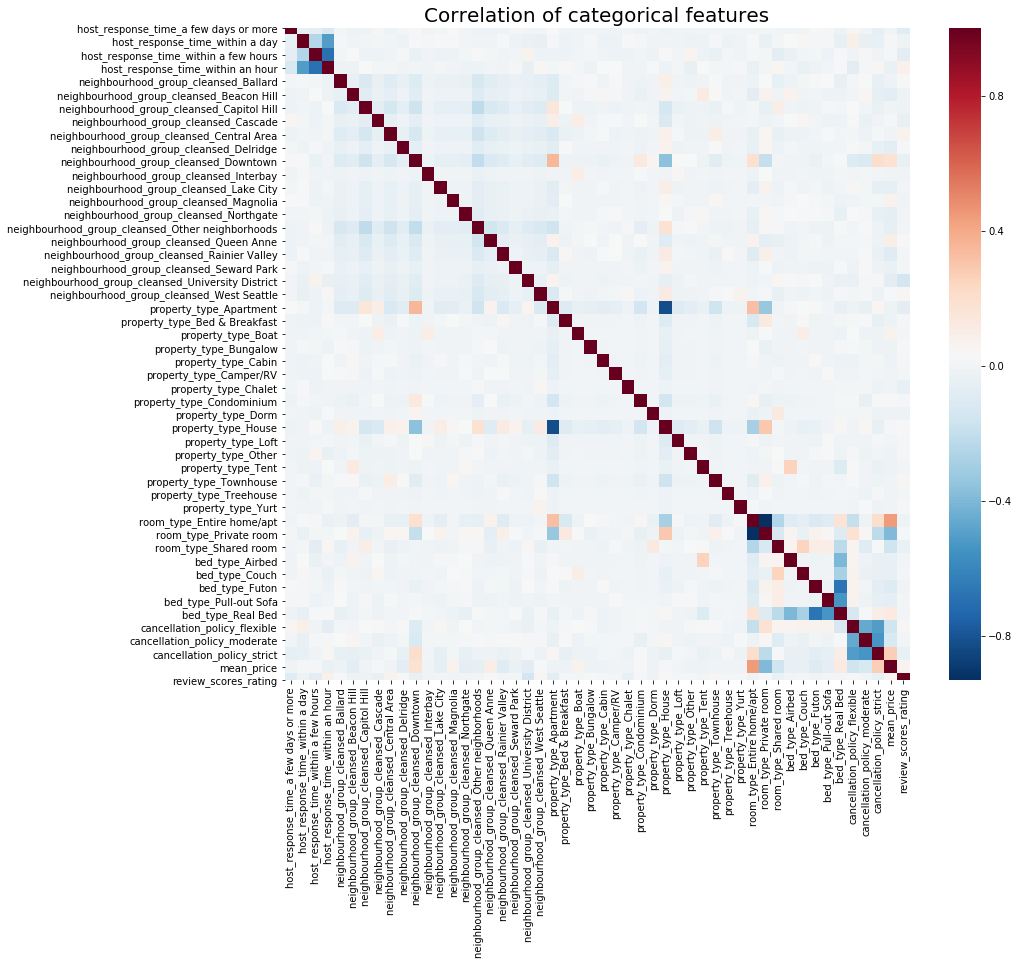

In [37]:
# we can correlation heatmap to check features correlation also
# As there are too many features to show in one heatmap, show categorical and numerical features in two plots.

numerical_listing=listing_encoded[numerical_features]
categotical_listing=listing_encoded.drop(numerical_features,axis=1)
categotical_listing[['mean_price','review_scores_rating']]=listing_cleansed[['mean_price','review_scores_rating']]


plt.subplots(figsize =(14, 12))
sns.heatmap(numerical_listing.corr(), annot=True,cmap='RdBu_r', fmt=".1f");
plt.title('Correlation of numerical features',size=20)

plt.subplots(figsize =(14, 12))
sns.heatmap(categotical_listing.corr(), annot=False,cmap='RdBu_r');
plt.title('Correlation of categorical features',size=20)

In [117]:
# Prepare data for price and review score predictor

from sklearn.model_selection import train_test_split

# try Lasso as its regularization part can help to select features by limiting some feature coefficients to 0
from sklearn.linear_model import LinearRegression, Lasso 

# random forest is a good model for starters, although it is prone to overfit
from sklearn.ensemble import RandomForestRegressor

#best r2_score is 1, score 0 is for constand predictor
from sklearn.metrics import r2_score 
from sklearn.preprocessing import StandardScaler

# listing_encoded_price=pd.get_dummies(listing_cleansed[numerical_features+categorical_features_price])


# price_data=listing_encoded_price.drop(['price','mean_price'], axis=1) # drop price as it's similar value to mean price
# price_target=listing_encoded_price['mean_price'] # use mean_price to eliminate time facotr

# X_train_p,X_test_p,y_train_p, y_test_p=train_test_split(price_data,price_target, train_size=0.8, random_state=0)

# scaler=StandardScaler()
# X_train_p=scaler.fit_transform(X_train_p)
# X_test_p=scaler.transform(X_test_p)

### Try dataset with missing rows dropped

In [127]:
listing_dropna_price=pd.get_dummies(listing_dropna[numerical_features+categorical_features_price])


price_data=listing_dropna_price.drop(['price','mean_price'], axis=1) # drop price as it's similar value to mean price
price_target=listing_dropna_price['mean_price'] # use mean_price to eliminate time facotr

X_train_p,X_test_p,y_train_p, y_test_p=train_test_split(price_data,price_target, train_size=0.8, random_state=0)

# scaler=StandardScaler()
# X_train_p=scaler.fit_transform(X_train_p)
# X_test_p=scaler.transform(X_test_p)

In [128]:
# linear regression model
lr_model=LinearRegression(normalize=True)
lr_model.fit(X_train_p,y_train_p)
y_preds_p1=lr_model.predict(X_test_p)
score_p_lr=r2_score(y_preds_p1,y_test_p)
print(score_p_lr) #-0.0026246719249187755, score no difference using normalizer or standardscaler
#negative score means model is worse than a constant predictor
# it is possibly due to overfitting with 60 features.


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [124]:
# try Lasso model as it can reduce irrelevant features
ls_model=Lasso(random_state=0)
ls_model.fit(X_train_p,y_train_p)
y_preds_p2=ls_model.predict(X_test_p)
score_p_ls=r2_score(y_preds_p2,y_test_p)
print(score_p_ls) #0.2866507315724691, score is better than linear regression

print(ls_model.coef_)
# Lasso model can push cooeffients for some features to 0, through regularization

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [41]:
# Using coefficients selected by Lasso, to get a smaller set of features
feature_selection=(ls_model.coef_!=0)
features_reduced=price_data.columns[feature_selection]
print(features_reduced)

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit',
       'cleaning_fee', 'guests_included', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable', 'reviews_per_month',
       'occupancy_rate', 'neighbourhood_group_cleansed_Beacon Hill',
       'neighbourhood_group_cleansed_Capitol Hill',
       'neighbourhood_group_cleansed_Cascade',
       'neighbourhood_group_cleansed_Delridge',
       'neighbourhood_group_cleansed_Downtown',
       'neighbourhood_group_cleansed_Interbay',
       'neighbourhood_group_cleansed_Lake City',
       'neighbourhood_group_cleansed_Magnolia',
       'neighbourhood_group_cleansed_Northgate',
       'neighbourhood_group_cleansed_Queen Anne',
       'neighbourhood_group_cleansed_Rainier Valley',
       'neighbourhood_group_cleansed_Seward Park',
       'neighbourhood_group_cleansed_University District',
       'property_type_Boat', 'property_type_

#### Rerun models using selected features from Lasso 

In [42]:
X_train_p,X_test_p,y_train_p, y_test_p=train_test_split(price_data[features_reduced],price_target, train_size=0.8, random_state=0)

scaler=StandardScaler()
X_train_p=scaler.fit_transform(X_train_p)
X_test_p=scaler.transform(X_test_p)

In [43]:
# linear regression model again
lr_model=LinearRegression()
lr_model.fit(X_train_p,y_train_p)
y_preds_p1=lr_model.predict(X_test_p)
score_p_lr=r2_score(y_preds_p1,y_test_p)
print(score_p_lr) #0.3483721583501207, score is much better than before


0.3483721583501207


In [44]:
# try random forest
rf_model=RandomForestRegressor(random_state=0)
rf_model.fit(X_train_p,y_train_p)
y_preds_p3=rf_model.predict(X_test_p)
score_p_rf=r2_score(y_preds_p3,y_test_p)
print(score_p_rf) #0.24727904370944775

0.24727904370944775


/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Text(0.5, 1.0, 'Price prediction using linear Regression')

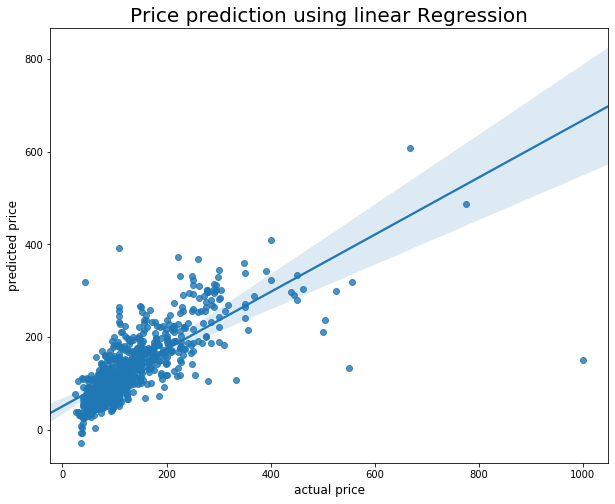

In [45]:
plt.subplots(figsize =(10, 8))
sns.regplot(y_test_p,y_preds_p1) 
plt.xlabel('actual price', size=12)
plt.ylabel('predicted price',size=12)
plt.title('Price prediction using linear Regression',size=20)

In [46]:
listing_encoded_reviews=pd.get_dummies(listing_cleansed[numerical_features+listing_encoded_reviews])

review_data= listing_encoded_reviews.drop(['review_scores_rating', 'price'] )# drop price as it's similar to mean price thus excessive
review_target=listing_encoded_reviews['review_scores_rating']

X_train,y_train, X_test, y_test=train_test_split(review_data,review_target, train_size=0.8, random_state=0)


NameError: name 'listing_encoded_reviews' is not defined